# Bagging Machine Learning Algorithm

### **B**ootstrap **Agg**regat**ing** or [Bagging](https://en.wikipedia.org/wiki/Bootstrap_aggregating)
* [Scikit- Learn Reference](http://scikit-learn.org/stable/modules/ensemble.html#bagging)
* Bootstrap sampling: Sampling with replacement
* Combine by averaging the output (regression)
* Combine by voting (classification)
* Can be applied to many classifiers which includes ANN, CART, etc.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.shape

(891, 15)

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
#df.dropna(inplace=True)
df['age'].fillna((df['age'].mean()),inplace=True)

In [6]:
df['pclass'].unique()

array([3, 1, 2], dtype=int64)

In [7]:
df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [8]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [9]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

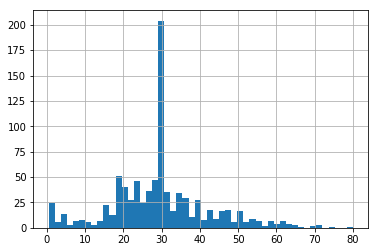

In [10]:
df['age'].hist(bins=50);

## Data Pre-processing

In [11]:
X = df[['pclass', 'sex', 'age']]

In [12]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

In [13]:
X['sex'] = lb.fit_transform(X['sex'])

C:\Users\VIPUL.GAUR\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
X.head()

,pclass,sex,age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0


In [15]:
X.shape

(891, 3)

In [16]:
X.describe()

,pclass,sex,age
count,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.699118
std,0.836071,0.477990,13.002015
min,1.000000,0.000000,0.420000
25%,2.000000,0.000000,22.000000
50%,3.000000,1.000000,29.699118
75%,3.000000,1.000000,35.000000
max,3.000000,1.000000,80.000000


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
pclass    891 non-null int64
sex       891 non-null int32
age       891 non-null float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 17.5 KB


In [18]:
y = df['survived']

In [19]:
y.value_counts()

0    549
1    342
Name: survived, dtype: int64

# Fit Model

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Importing Evaluation Metrics

In [23]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Defining a function so that we can get all the evaluation metrics at one place for each run

In [24]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))

## Decision Tree

In [25]:
clf = DecisionTreeClassifier(random_state=42)

In [26]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [27]:
print_score(clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9005

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       389
           1       0.91      0.82      0.86       234

    accuracy                           0.90       623
   macro avg       0.90      0.88      0.89       623
weighted avg       0.90      0.90      0.90       623


Confusion Matrix: 
 [[370  19]
 [ 43 191]]

Average Accuracy: 	 0.8075
Accuracy SD: 		 0.0382


In [28]:
print_score(clf, X_train, y_train, X_test, y_test, train=False) # Test

Test Result:

accuracy score: 0.7687

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.86      0.82       160
           1       0.76      0.63      0.69       108

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.75       268
weighted avg       0.77      0.77      0.76       268


Confusion Matrix: 
 [[138  22]
 [ 40  68]]



***

## Bagging (oob_score=False)

In [29]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [30]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=42,
                                                        splitter='best'),
      

In [31]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9005

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       389
           1       0.87      0.86      0.87       234

    accuracy                           0.90       623
   macro avg       0.89      0.89      0.89       623
weighted avg       0.90      0.90      0.90       623


Confusion Matrix: 
 [[359  30]
 [ 32 202]]

Average Accuracy: 	 0.7947
Accuracy SD: 		 0.0442


In [32]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.7612

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.82      0.80       160
           1       0.72      0.67      0.69       108

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268


Confusion Matrix: 
 [[132  28]
 [ 36  72]]



***

## Bagging (oob_score=True)

Use out-of-bag samples to estimate the generalization accuracy

In [33]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=5000,
                            bootstrap=True, oob_score=True,
                            n_jobs=-1, random_state=42)

In [34]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=42,
                                                        splitter='best'),
      

In [35]:
bag_clf.oob_score_

0.7881219903691814

In [36]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9005

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       389
           1       0.87      0.86      0.87       234

    accuracy                           0.90       623
   macro avg       0.89      0.89      0.89       623
weighted avg       0.90      0.90      0.90       623


Confusion Matrix: 
 [[359  30]
 [ 32 202]]

Average Accuracy: 	 0.7947
Accuracy SD: 		 0.0435


In [37]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.7612

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.82      0.80       160
           1       0.72      0.67      0.69       108

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268


Confusion Matrix: 
 [[132  28]
 [ 36  72]]



# Exercise: 

# Now try executing the same with n_estimators = 5000 and oob_score = True / False

***